# Data Science Bootcamp_project 1

## Exploratory Data Analysis (EDA) For Metropolitan Transportation Authority (MTA)  
 
The Metropolitan Transportation Authority (MTA) conducted a new survey demonstrates that subway riders are more concerned about crime and harassment than the pandemic COVID-19. The 33.000 people participated in the survey and 87% said the crime the main factor to stop people to use New York subway. Based on the number of crimes and incidents that are increasing on the news on daily basis. This project is proposing an analysis study to increase the safety of New York subways and reduces the crime rates. Our solution is to find the optimal subway stations and time to place and distribute police officers who have the task of observing the station areas and facilities. This nootebook provides an EDA for Metropolitan Transportation Authority (MTA) data set.  

In [1]:
# import the pakages  
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sqlalchemy import create_engine

# import plot pakages 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config Inline.Backend.figure_format = 'svg'

## Phase 1: Importing the MTA dataset

We have importing the dataset from the MTA website on the link http://web.mta.info/developers/turnstile.html
The three months chosen are April, May, and June, which correspond to the times when the Metropolitan Transportation Authority (MTA) conducted its survey. By analysing the data, we would recommend the best description of the security and police officers among the NYC subways.
 
  

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []  
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210410, 210417, 210424, 210501, 210508, 210515, 210522, 210529, 210605, 210612, 210619, 210626] # select 3 months from the dataset April,May and Joun
df = get_data(week_nums)

In [3]:
df.head() #disply a random rows from the dataset   

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2021,00:00:00,REGULAR,7552051,2578175
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2021,04:00:00,REGULAR,7552051,2578176
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2021,08:00:00,REGULAR,7552051,2578197
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2021,12:00:00,REGULAR,7552051,2578261
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2021,16:00:00,REGULAR,7552051,2578306


In [6]:
# to check the values of the data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511481 entries, 0 to 209410
Data columns (total 11 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
dtypes: int64(2), obj

## Phase 2: Preprocessing 
In phase two, we applied the prepossessing methods to the data (cleaning the data) which includes removing the spaces from the column names, removing the non-REGULAR values from 'DESC', droping unnecessary columns and rows, compining columes such as DATE and TIME. Also, we used SQL queries to prepare the dataset for the analysis phase. 

In [8]:
def data_formatting(df):
# Rename columns to remove whitespace
    df.columns = [column.strip() for column in df.columns]
    
# Create DATETIME column from 'DATE' and 'TIME' columns
    df['DATETIME'] = pd.to_datetime(df['DATE'] + " " + df['TIME'],
                                   format="%m/%d/%Y %H:%M:%S")    
# Create DAY_OF_WEEK column from DATETIME
    df['DAY_OF_WEEK'] = pd.to_datetime(df['DATETIME']).dt.dayofweek
    
# Remove non-REGULAR values from 'DESC'
    df = df.drop(df.loc[df.DESC != 'REGULAR'].index)
    
# Remove rows for PATH, RIT, and SRT since only checking on subway data
    df.drop(df.loc[df['DIVISION'].isin(['PTH','RIT','SRT'])].index, inplace=True)
    
# Drop unnecessary columns
    df = df.drop(['LINENAME', 'DIVISION', 'DESC'], axis=1)
    
    return df

In [9]:
#creating new dataframe
df2 = data_formatting(df)
df2.head(20)

C:\Users\Ashjan\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY_OF_WEEK
0,A002,R051,02-00-00,59 ST,04/03/2021,00:00:00,7552051,2578175,2021-04-03 00:00:00,5
2,A002,R051,02-00-00,59 ST,04/03/2021,08:00:00,7552051,2578197,2021-04-03 08:00:00,5
3,A002,R051,02-00-00,59 ST,04/03/2021,12:00:00,7552051,2578261,2021-04-03 12:00:00,5
4,A002,R051,02-00-00,59 ST,04/03/2021,16:00:00,7552051,2578306,2021-04-03 16:00:00,5
5,A002,R051,02-00-00,59 ST,04/03/2021,20:00:00,7552051,2578330,2021-04-03 20:00:00,5
6,A002,R051,02-00-00,59 ST,04/04/2021,00:00:00,7552051,2578340,2021-04-04 00:00:00,6
7,A002,R051,02-00-00,59 ST,04/04/2021,04:00:00,7552051,2578346,2021-04-04 04:00:00,6
8,A002,R051,02-00-00,59 ST,04/04/2021,08:00:00,7552051,2578354,2021-04-04 08:00:00,6
9,A002,R051,02-00-00,59 ST,04/04/2021,12:00:00,7552051,2578386,2021-04-04 12:00:00,6
10,A002,R051,02-00-00,59 ST,04/04/2021,16:00:00,7552051,2578413,2021-04-04 16:00:00,6


In [10]:
# Check for duplicates  for a given datetime
(df2.groupby(['C/A','UNIT','SCP','STATION','DATETIME'])
.ENTRIES.count()
.reset_index()
.sort_values('ENTRIES', ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-04-03 00:00:00,1
1479203,R158,R084,00-02-01,59 ST COLUMBUS,2021-05-20 04:00:00,1
1479217,R158,R084,00-02-01,59 ST COLUMBUS,2021-05-22 12:00:00,1
1479216,R158,R084,00-02-01,59 ST COLUMBUS,2021-05-22 08:00:00,1
1479215,R158,R084,00-02-01,59 ST COLUMBUS,2021-05-22 04:00:00,1


In [11]:
# Sorting the need it value columns  
df2.sort_values(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'], inplace=True, ascending=True)
df2.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY_OF_WEEK
0,A002,R051,02-00-00,59 ST,04/03/2021,00:00:00,7552051,2578175,2021-04-03 00:00:00,5
2,A002,R051,02-00-00,59 ST,04/03/2021,08:00:00,7552051,2578197,2021-04-03 08:00:00,5
3,A002,R051,02-00-00,59 ST,04/03/2021,12:00:00,7552051,2578261,2021-04-03 12:00:00,5
4,A002,R051,02-00-00,59 ST,04/03/2021,16:00:00,7552051,2578306,2021-04-03 16:00:00,5
5,A002,R051,02-00-00,59 ST,04/03/2021,20:00:00,7552051,2578330,2021-04-03 20:00:00,5


In [12]:
# Create previous datetime, entries and exits columns to calculate the total traffic  
df2[['PREV_DATETIME', "PREV_ENTRIES", "PREV_EXITS"]] = (df2
                                                .groupby(['C/A', 'UNIT', 'SCP', 'STATION'])\
                                                       ['DATETIME','ENTRIES','EXITS']
                                                .apply(lambda grp: grp.shift(1)))

In [13]:
# drop the "PREV_DATETIME" beacause we will not use it 
df2.dropna(subset=["PREV_DATETIME"], axis=0, inplace=True)


In [14]:
df2.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY_OF_WEEK,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS
2,A002,R051,02-00-00,59 ST,04/03/2021,08:00:00,7552051,2578197,2021-04-03 08:00:00,5,2021-04-03 00:00:00,7552051.0,2578175.0
3,A002,R051,02-00-00,59 ST,04/03/2021,12:00:00,7552051,2578261,2021-04-03 12:00:00,5,2021-04-03 08:00:00,7552051.0,2578197.0
4,A002,R051,02-00-00,59 ST,04/03/2021,16:00:00,7552051,2578306,2021-04-03 16:00:00,5,2021-04-03 12:00:00,7552051.0,2578261.0
5,A002,R051,02-00-00,59 ST,04/03/2021,20:00:00,7552051,2578330,2021-04-03 20:00:00,5,2021-04-03 16:00:00,7552051.0,2578306.0
6,A002,R051,02-00-00,59 ST,04/04/2021,00:00:00,7552051,2578340,2021-04-04 00:00:00,6,2021-04-03 20:00:00,7552051.0,2578330.0


In [15]:
# Functions for entry, exit counts, and traffic counts
def get_entry_counts(row, max_counter):
    counter = abs(row['ENTRIES'] - row['PREV_ENTRIES'])
# Set anomaly values due to reset of counters to the uniform NaN values
    if counter > max_counter:
        counter = np.nan
    return counter

def get_exit_counts(row, max_counter):
    counter = abs(row['EXITS'] - row['PREV_EXITS'])
# Set anomaly values due to reset of counters to the uniform NaN values
    if counter > max_counter:
        counter = np.nan
    return counter

def get_counts(df):
# Set max_counter = 14400, assuming only 1/person/sec/turnstile at a time in a 4HR interval
# Entry count
    df['entry_count'] = df.apply(get_entry_counts, axis=1, max_counter=1400)
    
# Exit count
    df['exit_count'] = df.apply(get_exit_counts, axis=1, max_counter=1400)
    
    return df

In [16]:
df3 = get_counts(df2)
df3.tail(10)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY_OF_WEEK,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS,entry_count,exit_count
207148,R730,R431,00-00-04,EASTCHSTER/DYRE,05/27/2021,09:00:00,1559810617,1728247189,2021-05-27 09:00:00,3,2021-05-27 05:00:00,1.559811e+09,1.728247e+09,81.0,12.0
207149,R730,R431,00-00-04,EASTCHSTER/DYRE,05/27/2021,13:00:00,1559810597,1728247197,2021-05-27 13:00:00,3,2021-05-27 09:00:00,1.559811e+09,1.728247e+09,20.0,8.0
207150,R730,R431,00-00-04,EASTCHSTER/DYRE,05/27/2021,17:00:00,1559810571,1728247222,2021-05-27 17:00:00,3,2021-05-27 13:00:00,1.559811e+09,1.728247e+09,26.0,25.0
207151,R730,R431,00-00-04,EASTCHSTER/DYRE,05/27/2021,21:00:00,1559810545,1728247251,2021-05-27 21:00:00,3,2021-05-27 17:00:00,1.559811e+09,1.728247e+09,26.0,29.0
207152,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,01:00:00,1559810541,1728247256,2021-05-28 01:00:00,4,2021-05-27 21:00:00,1.559811e+09,1.728247e+09,4.0,5.0
207153,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,05:00:00,1559810540,1728247256,2021-05-28 05:00:00,4,2021-05-28 01:00:00,1.559811e+09,1.728247e+09,1.0,0.0
207154,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,09:00:00,1559810479,1728247273,2021-05-28 09:00:00,4,2021-05-28 05:00:00,1.559811e+09,1.728247e+09,61.0,17.0
207155,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,13:00:00,1559810459,1728247283,2021-05-28 13:00:00,4,2021-05-28 09:00:00,1.559810e+09,1.728247e+09,20.0,10.0
207156,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,17:00:00,1559810427,1728247317,2021-05-28 17:00:00,4,2021-05-28 13:00:00,1.559810e+09,1.728247e+09,32.0,34.0
207157,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,21:00:00,1559810399,1728247344,2021-05-28 21:00:00,4,2021-05-28 17:00:00,1.559810e+09,1.728247e+09,28.0,27.0


In [17]:
# Cleaning NaN values in entry_count, for each NaN values, replace it with the mean of values before and after the NaN value
entry_list = list(df3['entry_count'])
ind = 0
for i in entry_list:
    if np.isnan(i) == 1:
        entry_list[ind] = np.nanmean([entry_list[ind-2],entry_list[ind-1],entry_list[ind+1],entry_list[ind+2]])
    ind += 1
    
df3['ENTRY_DIFF'] = entry_list

In [18]:
# to check if we have Nan values  
df3['ENTRY_DIFF'].isna().sum()

0

In [19]:
# Cleaning NaN values in exit_count
# For each NaN values, replace it with the mean of values before and after the NaN value
exit_list = list(df3['exit_count'])
ind = 0
for i in exit_list:
    if np.isnan(i) == 1:
        exit_list[ind] = np.nanmean([exit_list[ind-2],exit_list[ind-1],exit_list[ind+1],exit_list[ind+2]])
    ind += 1
    
df3['EXIT_DIFF'] = exit_list

In [20]:
# to check if we have Nan values  
df3['EXIT_DIFF'].isna().sum()

0

In [21]:
# Get total traffic count 
df3['TOTAL_TRAFFIC'] = df3['ENTRY_DIFF'] + df3['EXIT_DIFF']
df3.tail()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY_OF_WEEK,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS,entry_count,exit_count,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC
207153,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,05:00:00,1559810540,1728247256,2021-05-28 05:00:00,4,2021-05-28 01:00:00,1.559811e+09,1.728247e+09,1.0,0.0,1.0,0.0,1.0
207154,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,09:00:00,1559810479,1728247273,2021-05-28 09:00:00,4,2021-05-28 05:00:00,1.559811e+09,1.728247e+09,61.0,17.0,61.0,17.0,78.0
207155,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,13:00:00,1559810459,1728247283,2021-05-28 13:00:00,4,2021-05-28 09:00:00,1.559810e+09,1.728247e+09,20.0,10.0,20.0,10.0,30.0
207156,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,17:00:00,1559810427,1728247317,2021-05-28 17:00:00,4,2021-05-28 13:00:00,1.559810e+09,1.728247e+09,32.0,34.0,32.0,34.0,66.0
207157,R730,R431,00-00-04,EASTCHSTER/DYRE,05/28/2021,21:00:00,1559810399,1728247344,2021-05-28 21:00:00,4,2021-05-28 17:00:00,1.559810e+09,1.728247e+09,28.0,27.0,28.0,27.0,55.0


In [22]:
df3['TIME'] = df3['DATETIME'].apply(lambda x: x.time())
print(df3.TIME.unique())
print(df3.TIME.value_counts())

[datetime.time(8, 0) datetime.time(12, 0) datetime.time(16, 0) ...
 datetime.time(7, 51, 17) datetime.time(6, 30, 46)
 datetime.time(6, 31, 54)]
16:00:00    203980
08:00:00    203893
12:00:00    203835
04:00:00    203648
20:00:00    203558
00:00:00    201023
21:00:00    147913
13:00:00    147808
09:00:00    147754
17:00:00    147723
05:00:00    147389
01:00:00    146125
10:00:00      8832
14:00:00      8802
06:00:00      8743
18:00:00      8694
22:00:00      8659
02:00:00      8642
15:00:00      3206
03:00:00      3196
19:00:00      3192
07:00:00      3169
11:00:00      3143
23:00:00      3102
12:22:00      2897
20:22:00      2890
16:22:00      2888
08:22:00      2888
04:22:00      2875
00:22:00      2841
             ...  
09:12:25         3
12:23:09         3
19:59:54         3
11:49:03         2
19:11:37         2
09:04:33         2
19:04:21         2
08:24:17         2
14:11:28         2
18:49:32         2
06:58:50         2
11:19:23         2
11:50:23         2
10:53:31         2


In [23]:
# Turn all time intervals to 4-hour frequency
df3 = df3.groupby(['C/A', 'UNIT', 'SCP', 'STATION',
                  pd.Grouper(key='DATETIME', freq='4H'),
                  'DAY_OF_WEEK', 'TIME']).sum().reset_index()
# Double checking on time intervals
df3['TIME'] = df3['DATETIME'].apply(lambda x: x.time())
print(df3.TIME.unique())

[datetime.time(8, 0) datetime.time(12, 0) datetime.time(16, 0)
 datetime.time(20, 0) datetime.time(0, 0) datetime.time(4, 0)]


In [24]:
# Syncing Day_of_week column to the new datetime
df3['DAY_OF_WEEK'] = pd.to_datetime(df3['DATETIME']).dt.dayofweek

In [25]:
#Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
df3.groupby(['C/A','UNIT','SCP','STATION','DATETIME']).sum().reset_index()

,C/A,UNIT,SCP,STATION,DATETIME,DAY_OF_WEEK,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,entry_count,exit_count,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC
0,A002,R051,02-00-00,59 ST,2021-04-03 08:00:00,5,7552051,2578197,7.552051e+06,2.578175e+06,0.0,22.0,0.0,22.0,22.0
1,A002,R051,02-00-00,59 ST,2021-04-03 12:00:00,5,7552051,2578261,7.552051e+06,2.578197e+06,0.0,64.0,0.0,64.0,64.0
2,A002,R051,02-00-00,59 ST,2021-04-03 16:00:00,5,7552051,2578306,7.552051e+06,2.578261e+06,0.0,45.0,0.0,45.0,45.0
3,A002,R051,02-00-00,59 ST,2021-04-03 20:00:00,5,7552051,2578330,7.552051e+06,2.578306e+06,0.0,24.0,0.0,24.0,24.0
4,A002,R051,02-00-00,59 ST,2021-04-04 00:00:00,6,7552051,2578340,7.552051e+06,2.578330e+06,0.0,10.0,0.0,10.0,10.0
5,A002,R051,02-00-00,59 ST,2021-04-04 04:00:00,6,7552051,2578346,7.552051e+06,2.578340e+06,0.0,6.0,0.0,6.0,6.0
6,A002,R051,02-00-00,59 ST,2021-04-04 08:00:00,6,7552051,2578354,7.552051e+06,2.578346e+06,0.0,8.0,0.0,8.0,8.0
7,A002,R051,02-00-00,59 ST,2021-04-04 12:00:00,6,7552051,2578386,7.552051e+06,2.578354e+06,0.0,32.0,0.0,32.0,32.0
8,A002,R051,02-00-00,59 ST,2021-04-04 16:00:00,6,7552051,2578413,7.552051e+06,2.578386e+06,0.0,27.0,0.0,27.0,27.0
9,A002,R051,02-00-00,59 ST,2021-04-04 20:00:00,6,7552051,2578428,7.552051e+06,2.578413e+06,0.0,15.0,0.0,15.0,15.0


In [26]:
df2.groupby(['C/A','UNIT','SCP','STATION','DATETIME']).sum().reset_index()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,DAY_OF_WEEK,PREV_ENTRIES,PREV_EXITS,entry_count,exit_count,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC
0,A002,R051,02-00-00,59 ST,2021-04-03 08:00:00,7552051,2578197,5,7.552051e+06,2.578175e+06,0.0,22.0,0.0,22.0,22.0
1,A002,R051,02-00-00,59 ST,2021-04-03 12:00:00,7552051,2578261,5,7.552051e+06,2.578197e+06,0.0,64.0,0.0,64.0,64.0
2,A002,R051,02-00-00,59 ST,2021-04-03 16:00:00,7552051,2578306,5,7.552051e+06,2.578261e+06,0.0,45.0,0.0,45.0,45.0
3,A002,R051,02-00-00,59 ST,2021-04-03 20:00:00,7552051,2578330,5,7.552051e+06,2.578306e+06,0.0,24.0,0.0,24.0,24.0
4,A002,R051,02-00-00,59 ST,2021-04-04 00:00:00,7552051,2578340,6,7.552051e+06,2.578330e+06,0.0,10.0,0.0,10.0,10.0
5,A002,R051,02-00-00,59 ST,2021-04-04 04:00:00,7552051,2578346,6,7.552051e+06,2.578340e+06,0.0,6.0,0.0,6.0,6.0
6,A002,R051,02-00-00,59 ST,2021-04-04 08:00:00,7552051,2578354,6,7.552051e+06,2.578346e+06,0.0,8.0,0.0,8.0,8.0
7,A002,R051,02-00-00,59 ST,2021-04-04 12:00:00,7552051,2578386,6,7.552051e+06,2.578354e+06,0.0,32.0,0.0,32.0,32.0
8,A002,R051,02-00-00,59 ST,2021-04-04 16:00:00,7552051,2578413,6,7.552051e+06,2.578386e+06,0.0,27.0,0.0,27.0,27.0
9,A002,R051,02-00-00,59 ST,2021-04-04 20:00:00,7552051,2578428,6,7.552051e+06,2.578413e+06,0.0,15.0,0.0,15.0,15.0


In [27]:
# we use group by to sum and reset an index to it, every day of week would have a number based on the number of traffic     
(df3
.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME', 'DAY_OF_WEEK'])
.sum()
.reset_index())

,C/A,UNIT,SCP,STATION,DATETIME,DAY_OF_WEEK,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,entry_count,exit_count,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC
0,A002,R051,02-00-00,59 ST,2021-04-03 08:00:00,5,7552051,2578197,7.552051e+06,2.578175e+06,0.0,22.0,0.0,22.0,22.0
1,A002,R051,02-00-00,59 ST,2021-04-03 12:00:00,5,7552051,2578261,7.552051e+06,2.578197e+06,0.0,64.0,0.0,64.0,64.0
2,A002,R051,02-00-00,59 ST,2021-04-03 16:00:00,5,7552051,2578306,7.552051e+06,2.578261e+06,0.0,45.0,0.0,45.0,45.0
3,A002,R051,02-00-00,59 ST,2021-04-03 20:00:00,5,7552051,2578330,7.552051e+06,2.578306e+06,0.0,24.0,0.0,24.0,24.0
4,A002,R051,02-00-00,59 ST,2021-04-04 00:00:00,6,7552051,2578340,7.552051e+06,2.578330e+06,0.0,10.0,0.0,10.0,10.0
5,A002,R051,02-00-00,59 ST,2021-04-04 04:00:00,6,7552051,2578346,7.552051e+06,2.578340e+06,0.0,6.0,0.0,6.0,6.0
6,A002,R051,02-00-00,59 ST,2021-04-04 08:00:00,6,7552051,2578354,7.552051e+06,2.578346e+06,0.0,8.0,0.0,8.0,8.0
7,A002,R051,02-00-00,59 ST,2021-04-04 12:00:00,6,7552051,2578386,7.552051e+06,2.578354e+06,0.0,32.0,0.0,32.0,32.0
8,A002,R051,02-00-00,59 ST,2021-04-04 16:00:00,6,7552051,2578413,7.552051e+06,2.578386e+06,0.0,27.0,0.0,27.0,27.0
9,A002,R051,02-00-00,59 ST,2021-04-04 20:00:00,6,7552051,2578428,7.552051e+06,2.578413e+06,0.0,15.0,0.0,15.0,15.0


In [41]:
# Drop unnecessary columns
turnstile_df = df3.drop(['C/A', 'UNIT', 'SCP',
                         'ENTRIES', 'EXITS',
                         'PREV_ENTRIES', 'PREV_EXITS', 
                         'entry_count', 'exit_count'], axis=1)
print(turnstile_df.shape)
turnstile_df.head()


(2214166, 7)


,STATION,DATETIME,DAY_OF_WEEK,TIME,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC
0,59 ST,2021-04-03 08:00:00,5,08:00:00,0.0,22.0,22.0
1,59 ST,2021-04-03 12:00:00,5,12:00:00,0.0,64.0,64.0
2,59 ST,2021-04-03 16:00:00,5,16:00:00,0.0,45.0,45.0
3,59 ST,2021-04-03 20:00:00,5,20:00:00,0.0,24.0,24.0
4,59 ST,2021-04-04 00:00:00,6,00:00:00,0.0,10.0,10.0


In [42]:
station_daily = df3.groupby(['STATION','DATETIME'])[['TOTAL_TRAFFIC']].sum().reset_index()
station_daily.head()

,STATION,DATETIME,TOTAL_TRAFFIC
0,1 AV,2021-04-03 04:00:00,311.0
1,1 AV,2021-04-03 08:00:00,534.0
2,1 AV,2021-04-03 12:00:00,2330.0
3,1 AV,2021-04-03 16:00:00,3816.0
4,1 AV,2021-04-03 20:00:00,4074.0


In [43]:
#The below table is for every station's total traffic and takes the top 10 stations with the least amount of traffic.  
stations_total = station_daily.groupby('STATION').sum()\
    .sort_values('TOTAL_TRAFFIC', ascending=True)\
    .reset_index()

stations_total.head(11)

,STATION,TOTAL_TRAFFIC
0,BROAD CHANNEL,14500.00
1,BEACH 105 ST,19312.00
2,BEACH 98 ST,29237.00
3,BEACH 90 ST,52753.00
4,BAYCHESTER AV,52993.75
5,ROCKAWAY PARK B,58288.00
6,BEACH 44 ST,60478.00
7,NEPTUNE AV,62996.00
8,AQUEDUCT RACETR,63787.50
9,EASTCHSTER/DYRE,69166.50


## Phase 3: MTA data Analysis and Visualisation 
In this phase we used histogram bar and barchart to visualise the data beased on the minimum number of station the top 10. The histogram shows the distribution if the trafic across the stations that are not crowded. The barchart shows the top least station are not busy.  

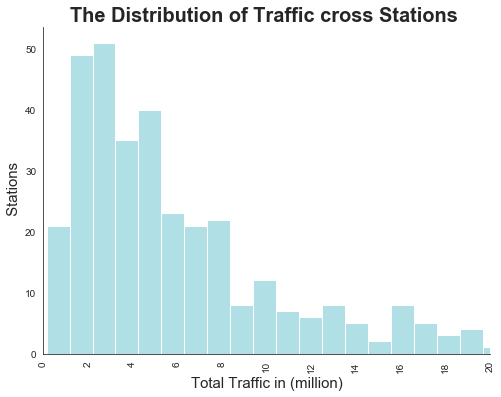

In [44]:
plt.figure(figsize=[8,6])
sns.set_style("white")
plt.hist(stations_total['TOTAL_TRAFFIC'], bins=70, color="powderblue")
plt.title("The Distribution of Traffic cross Stations ",size=20,weight='bold')

plt.xlabel("Total Traffic in (million)", size=15)
plt.ylabel(" Stations", size=15) 
plt.xlim([0,220000])
plt.xticks(range(0,2200000,200000),[str(int(i/100000)) for i in range(0,2200000,200000)])
sns.despine();
plt.xticks(rotation=90);


In [45]:
station_avg = station_daily.groupby('STATION').mean().round(0)\
    .sort_values('TOTAL_TRAFFIC', ascending=True)\
    .reset_index()
# Sanity check
station_avg.head(10)

,STATION,TOTAL_TRAFFIC
0,BROAD CHANNEL,29.0
1,BEACH 105 ST,39.0
2,BEACH 98 ST,58.0
3,BEACH 90 ST,107.0
4,ROCKAWAY PARK B,117.0
5,BEACH 44 ST,122.0
6,AQUEDUCT RACETR,127.0
7,NEPTUNE AV,131.0
8,BEACH 36 ST,158.0
9,215 ST,164.0


C:\Users\Ashjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

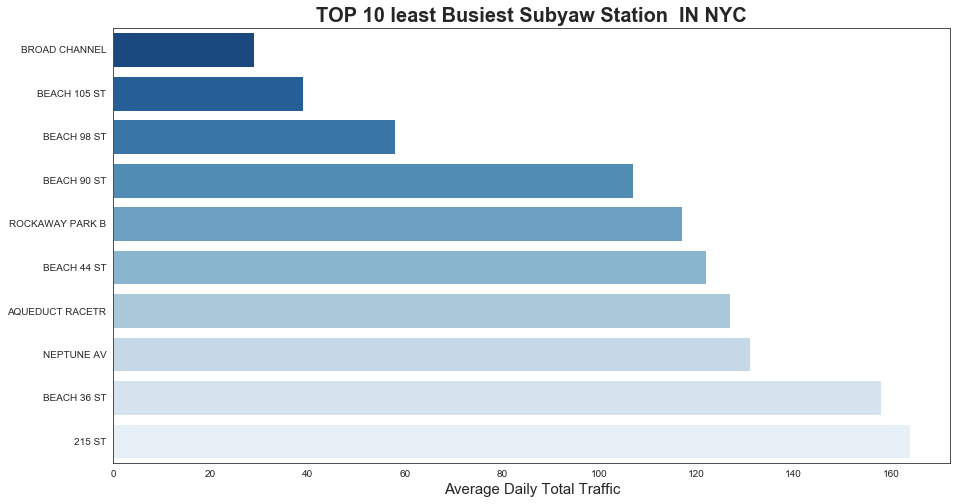

In [46]:
top_10_avg_daily = station_avg[:10]
plt.figure(figsize=[15,8])
sns.set_style("white")
palette = sns.color_palette("Blues",n_colors=10)
palette.reverse()
ax = sns.barplot('TOTAL_TRAFFIC', 'STATION', data=top_10_avg_daily, orient="horizontal", palette=palette)

plt.title('TOP 10 least Busiest Subyaw Station  IN NYC', size=20, weight='bold')
plt.xlabel("Average Daily Total Traffic", size=15)
plt.ylabel("")


In [47]:
# Top 10 Stations list has the minimum traffic pattern in those stations
top10_list = list(top_10_avg_daily['STATION'])
print(top10_list)

# Top 10 Stations df  has the minimum traffic pattern in those stations 
top10_df = df[df['STATION'].isin(top10_list)]
top10_df.head()

['BROAD CHANNEL', 'BEACH 105 ST', 'BEACH 98 ST', 'BEACH 90 ST', 'ROCKAWAY PARK B', 'BEACH 44 ST', 'AQUEDUCT RACETR', 'NEPTUNE AV', 'BEACH 36 ST', '215 ST']


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAY_OF_WEEK
72037,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,04/03/2021,00:00:00,REGULAR,0,0,2021-04-03 00:00:00,5
72038,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,04/03/2021,04:00:00,REGULAR,0,0,2021-04-03 04:00:00,5
72039,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,04/03/2021,08:00:00,REGULAR,0,0,2021-04-03 08:00:00,5
72040,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,04/03/2021,12:00:00,REGULAR,0,0,2021-04-03 12:00:00,5
72041,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,04/03/2021,16:00:00,REGULAR,0,0,2021-04-03 16:00:00,5


In [50]:
#top10_daily = top10_df.groupby(["STATION","DATE","DAY_OF_WEEK"])[['TOTAL_TRAFFIC']].sum().reset_index()


In [71]:
mask = ((df3["C/A"] == "N183") &
        (df3["UNIT"] == "R415") & 
        (df3["SCP"] == "00-00-00") & 
        (df3["STATION"] == "BROAD CHANNEL"))

df3[mask].head()

,C/A,UNIT,SCP,STATION,DATETIME,DAY_OF_WEEK,TIME,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,entry_count,exit_count,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC
830818,N183,R415,00-00-00,BROAD CHANNEL,2021-04-03 04:00:00,5,04:00:00,104280,74831,104280.0,74831.0,0.0,0.0,0.0,0.0,0.0
830819,N183,R415,00-00-00,BROAD CHANNEL,2021-04-03 08:00:00,5,08:00:00,104281,74834,104280.0,74831.0,1.0,3.0,1.0,3.0,4.0
830820,N183,R415,00-00-00,BROAD CHANNEL,2021-04-03 12:00:00,5,12:00:00,104283,74839,104281.0,74834.0,2.0,5.0,2.0,5.0,7.0
830821,N183,R415,00-00-00,BROAD CHANNEL,2021-04-03 16:00:00,5,16:00:00,104286,74845,104283.0,74839.0,3.0,6.0,3.0,6.0,9.0
830822,N183,R415,00-00-00,BROAD CHANNEL,2021-04-03 20:00:00,5,20:00:00,104286,74853,104286.0,74845.0,0.0,8.0,0.0,8.0,8.0


In [67]:
#df[df["STATION"] == "BROAD CHANNEL"]

In [73]:
station_daily_BROAD_CHANNEL = station_daily[station_daily['STATION'] == 'BROAD CHANNEL']
station_daily_BROAD_CHANNEL.head()

,STATION,DATETIME,TOTAL_TRAFFIC
79574,BROAD CHANNEL,2021-04-03 04:00:00,4.0
79575,BROAD CHANNEL,2021-04-03 08:00:00,12.0
79576,BROAD CHANNEL,2021-04-03 12:00:00,15.0
79577,BROAD CHANNEL,2021-04-03 16:00:00,22.0
79578,BROAD CHANNEL,2021-04-03 20:00:00,14.0


Text(0.5, 1.0, 'Daily Entries for BROAD CHANNEL Station')

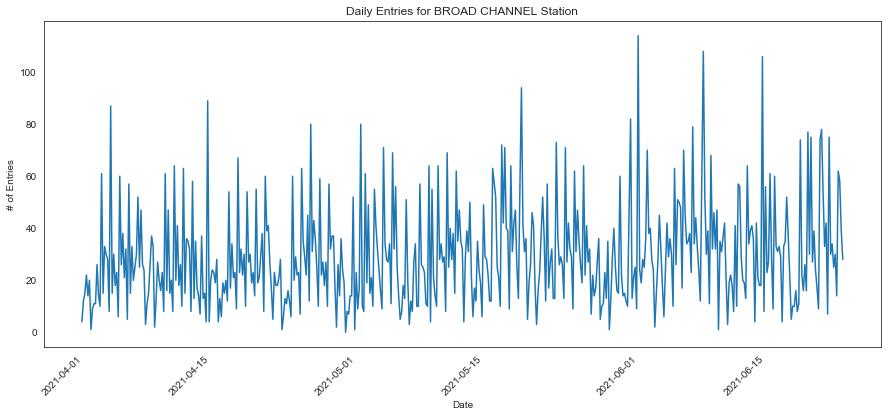

In [101]:
plt.figure(figsize=(15,6))
plt.plot(station_daily_BROAD_CHANNEL['DATETIME'], station_daily_BROAD_CHANNEL['TOTAL_TRAFFIC'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for BROAD CHANNEL Station')

In [102]:
station_daily_BROAD_CHANNEL['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_BROAD_CHANNEL['DATETIME']).dt.weekday_name
station_daily_BROAD_CHANNEL['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_BROAD_CHANNEL['DATETIME']).dt.week
station_daily_BROAD_CHANNEL.head(20)

C:\Users\Ashjan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ashjan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATION,DATETIME,TOTAL_TRAFFIC,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
79574,BROAD CHANNEL,2021-04-03 04:00:00,4.0,Saturday,13
79575,BROAD CHANNEL,2021-04-03 08:00:00,12.0,Saturday,13
79576,BROAD CHANNEL,2021-04-03 12:00:00,15.0,Saturday,13
79577,BROAD CHANNEL,2021-04-03 16:00:00,22.0,Saturday,13
79578,BROAD CHANNEL,2021-04-03 20:00:00,14.0,Saturday,13
79579,BROAD CHANNEL,2021-04-04 00:00:00,20.0,Sunday,13
79580,BROAD CHANNEL,2021-04-04 04:00:00,1.0,Sunday,13
79581,BROAD CHANNEL,2021-04-04 08:00:00,9.0,Sunday,13
79582,BROAD CHANNEL,2021-04-04 12:00:00,11.0,Sunday,13
79583,BROAD CHANNEL,2021-04-04 16:00:00,11.0,Sunday,13


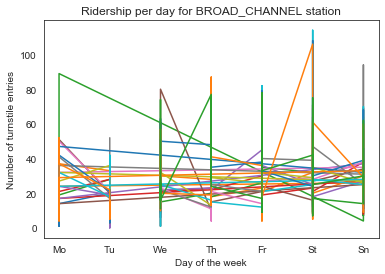

In [103]:
for i, var in station_daily_BROAD_CHANNEL.groupby('WEEK_OF_YEAR'):
    plt.plot(var['DAY_OF_WEEK_NUM'], var['TOTAL_TRAFFIC'])
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for BROAD_CHANNEL station')
plt.show;